In [3]:
"""Varying all 3: b,c,h"""

'Varying all 3: b,c,h'

In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from L96 import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)
sns.set_style('darkgrid')



In [5]:
"""Two-Level Lorenz 96"""

K = 4  # index for slow variables (total=4)
J = 4 # index for fast variables (total=16)
F = 10  # forcing
# b = 10
# c = 10
# h = 1


In [6]:
X0 = np.random.randn(K)
Y0 = np.random.randn(J*K)

print(X0.shape)
print(Y0.shape)

(4,)
(16,)


In [7]:
n_iter = 500 #number of different parameter simulations
t = 51
dt = 0.005

b_ = np.random.uniform(5,15,n_iter)
c_ = np.random.uniform(5,15,n_iter)
#b_ = np.full(n_iter,10)
#c_ = np.full(n_iter,10)

h_ = np.random.uniform(0,2,n_iter)


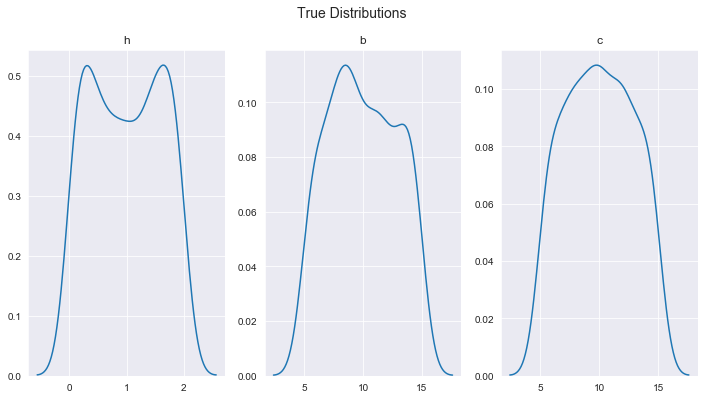

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

sns.distplot(h_, hist=False, ax=ax[0]).set_title('h')
sns.distplot(b_, hist=False, ax=ax[1]).set_title('b')
sns.distplot(c_, hist=False, ax=ax[2]).set_title('c')

plt.suptitle('True Distributions', fontsize=14)
plt.show()

In [9]:
%%time

# out = []
# X_ = []
# Y_ = []

# for i in range(n_iter):
#     print('n_iter: ', i)
#     h = h_[i] 
#     c = c_[i] 
#     b = b_[i]
#     l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
#     l96_ref.iterate(t)
    
#     out.append(l96_ref.history)
    
    

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [10]:
print('done')

done


In [11]:
# """Pickle Output Data"""

# outfile = open("F_10_i_500_T_51_dt_0.005_X_4.pkl", "wb" )
# pickle.dump(out, outfile)
# outfile.close()


In [12]:
"""Load Output Pickle File"""

infile = open("F_10_i_500_T_51_dt_0.005_X_4.pkl",'rb')
out = pickle.load(infile)
infile.close()


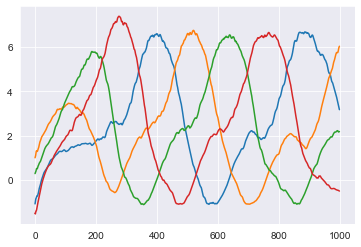

In [13]:
plt.plot((out[0].X.values[:1000]))

plt.show()

In [14]:
X_ = []
Y_ = []

for i in range(n_iter):
    X_.append((out[i]).X.values)
    Y_.append((out[i]).Y.values)
    

In [15]:
"""Discard Initial Transient Steps"""

X_ = np.array(X_)
print('X_ shape: ', X_.shape)
X_ = X_[:,:10000,:]
print('X_shape after discarding: ', X_.shape)

Y_ = np.array(Y_)
print('Y_ shape: ', Y_.shape)
Y_ = Y_[:,:10000,:]
print('Y_shape after discarding: ', Y_.shape)



X_ shape:  (500, 10201, 4)
X_shape after discarding:  (500, 10000, 4)
Y_ shape:  (500, 10201, 16)
Y_shape after discarding:  (500, 10000, 16)


In [16]:
"""Reshaping Data"""

X = X_.reshape(X_.shape[0]*X_.shape[1], K)
print('X reshaped: ', X.shape)
X_last = X_[:,-1,:]
print('X_last: ', X_last.shape)


Y = Y_.reshape(Y_.shape[0]*Y_.shape[1], K*J)
print('Y reshaped: ', Y.shape)
Y_last = Y_[:,-1,:]
print('Y_last: ', Y_last.shape)


h_truth_ = []
b_truth_ = []
c_truth_ = []

for i in range(n_iter):
    temp = np.ones(X_.shape[1])*h_[i]
    temp2 = np.ones(X_.shape[1])*b_[i]
    temp3 = np.ones(X_.shape[1])*c_[i]
    h_truth_.append(temp)
    b_truth_.append(temp2)
    c_truth_.append(temp3)
    
    
h_truth_ = np.array(h_truth_)
print('h shape: ', h_truth_.shape)
h_truth = h_truth_.reshape(n_iter*X_.shape[1],1)
print('h_truth (reshaped): ', h_truth.shape)
h_truth_last = h_.reshape(-1,1)
print('h_truth_last: ', h_truth_last.shape)

b_truth_ = np.array(b_truth_)
print('b shape: ', b_truth_.shape)
b_truth = b_truth_.reshape(n_iter*X_.shape[1],1)
print('b_truth (reshaped): ', h_truth.shape)
b_truth_last = b_.reshape(-1,1)
print('b_truth_last: ', b_truth_last.shape)

c_truth_ = np.array(c_truth_)
print('c shape: ', c_truth_.shape)
c_truth = c_truth_.reshape(n_iter*X_.shape[1],1)
print('c_truth (reshaped): ', c_truth.shape)
c_truth_last = h_.reshape(-1,1)
print('c_truth_last: ', c_truth_last.shape)


X reshaped:  (5000000, 4)
X_last:  (500, 4)
Y reshaped:  (5000000, 16)
Y_last:  (500, 16)
h shape:  (500, 10000)
h_truth (reshaped):  (5000000, 1)
h_truth_last:  (500, 1)
b shape:  (500, 10000)
b_truth (reshaped):  (5000000, 1)
b_truth_last:  (500, 1)
c shape:  (500, 10000)
c_truth (reshaped):  (5000000, 1)
c_truth_last:  (500, 1)


In [17]:
# plt.figure(figsize=(6,8), frameon=True)
# plt.imshow(X[:1000, :],cmap='RdBu', aspect='auto', alpha=0.6)
# plt.xticks([0,1,2,3])
# plt.grid()
# plt.colorbar()
# #plt.show()

# plt.savefig("colormap.pdf", bbox_inches="tight")

In [18]:
X_in = X_last
dataset = np.hstack((X_in,h_truth_last, b_truth_last, c_truth_last))
np.random.shuffle(dataset)
print(dataset.shape)


(500, 7)


In [19]:
# X_in = np.hstack((X,Y))
# dataset = np.hstack((X_in,h_truth))
# np.random.shuffle(dataset)
# print(dataset.shape)


In [21]:
n_data = dataset.shape[0]
split = int(0.6*n_data)

X_train = dataset[:split, :K]
y_train = dataset[:split, K]
X_test = dataset[split:, :K]
y_test = dataset[split:, K]


In [22]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(300, 4)
(200, 4)
(300,)
(200,)


In [23]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [24]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)


In [28]:
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(64, activation='relu', input_shape=(K,)))

model.add(Dense(32, activation='relu', input_shape=(K,)))

# Add one hidden layer 
model.add(Dense(16, activation='relu'))

# Add an output layer 
model.add(Dense(1))

In [29]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

In [30]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Train on 240 samples, validate on 60 samples
Epoch 1/50
240/240 [==============================] - 1s 4ms/step - loss: 1.7322 - mae: 1.1775 - val_loss: 1.3304 - val_mae: 0.9885
Epoch 2/50
240/240 [==============================] - 0s 146us/step - loss: 1.3048 - mae: 0.9657 - val_loss: 1.0112 - val_mae: 0.8060
Epoch 3/50
240/240 [==============================] - 0s 118us/step - loss: 1.0100 - mae: 0.8238 - val_loss: 0.7783 - val_mae: 0.6838
Epoch 4/50
240/240 [==============================] - 0s 119us/step - loss: 0.8314 - mae: 0.7624 - val_loss: 0.6469 - val_mae: 0.6474
Epoch 5/50
240/240 [==============================] - 0s 125us/step - loss: 0.7222 - mae: 0.7246 - val_loss: 0.5801 - val_mae: 0.6407
Epoch 6/50
240/240 [==============================] - 0s 122us/step - loss: 0.6457 - mae: 0.6957 - val_loss: 0.5334 - val_mae: 0.6264
Epoch 7/50
240/240 [==============================] - 0s 153us/step - loss: 0.5936 - mae: 0.6745 - val_loss: 0.4970 - val_mae: 0.6104
Epoch 8/50
240/240 

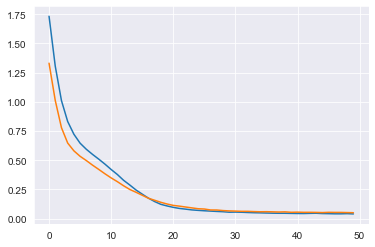

In [31]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [32]:
score = model.evaluate(X_test, y_test)
print(score)

200/200 [==============================] - 0s 40us/step
[0.06492233216762543, 0.2049635648727417]


In [59]:
pred = model.predict(X_test)

In [60]:
print(pred.shape)
print(y_test.shape)

(200, 1)
(200,)


In [61]:
"""Calcualte R2 Score"""
import sklearn

sklearn.metrics.r2_score(y_test, pred, sample_weight=None, multioutput='uniform_average')

0.8174334339763344

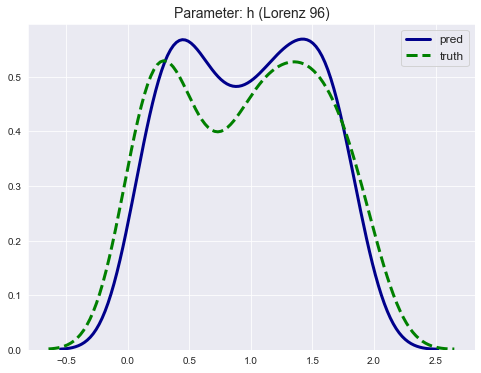

In [36]:
plt.figure(figsize=(8,6))

sns.distplot(pred, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, label='pred')

sns.distplot(y_test, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, 'linestyle': '--'}, label='truth')


plt.title('Parameter: h (Lorenz 96)', fontsize=14)
plt.legend(fontsize=12)
plt.show()


In [37]:
pred.shape

(200, 1)

In [38]:
h = pred[0]
b = b_truth_last[0]
c = c_truth_last[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history
x = out.X.values
x.shape


(10201, 4)

In [39]:
h = y_test[0]
b = b_truth_last[0]
c = c_truth_last[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history

x_ = out.X.values
x_.shape


(10201, 4)

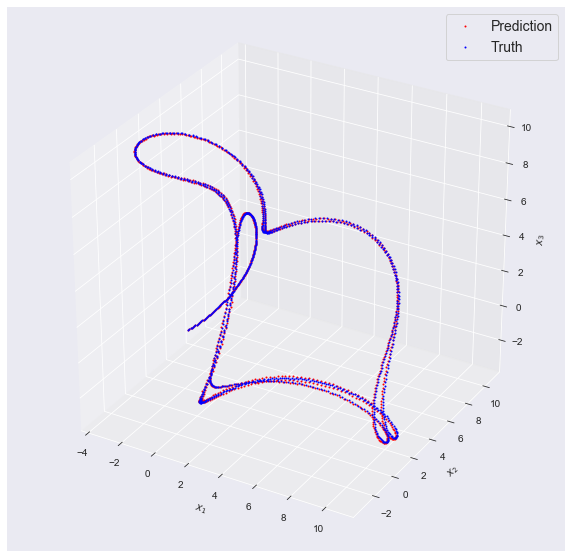

In [43]:
fig = plt.figure(figsize=(10,10))

from_to = range(1000)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(x[from_to,0],x[from_to,1], x[from_to,2], '.r',markersize=2, label='Prediction')
ax.plot(x_[from_to,0],x_[from_to,1], x_[from_to,2], '.b', markersize=2, label='Truth')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend(fontsize=14)


# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot(x_[:,0],x_[:,1], x_[:,2], '.b')
# ax.set_xlabel('$x_1$')
# ax.set_ylabel('$x_2$')
# ax.set_zlabel('$x_3$')
# plt.title('Truth')

plt.show()

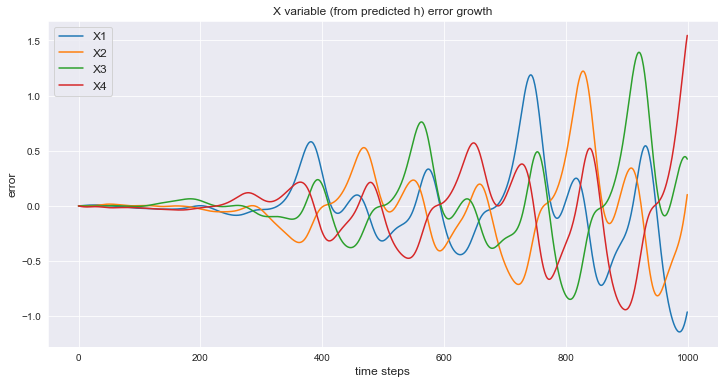

In [44]:
plt.figure(figsize=(12,6))
plt.plot(x[from_to,0]-x_[from_to,0], label='X1')
plt.plot(x[from_to,1]-x_[from_to,1], label='X2')
plt.plot(x[from_to,2]-x_[from_to,2], label='X3')
plt.plot(x[from_to,3]-x_[from_to,3], label='X4')
plt.ylabel('error', fontsize=12)
plt.xlabel('time steps', fontsize=12)
plt.title('X variable (from predicted h) error growth')
plt.legend(fontsize=12)
plt.show()

## Gaussian Processes

In [45]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RationalQuadratic
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel
from mpl_toolkits.mplot3d import Axes3D


In [46]:
# n = 50  
# index = np.random.choice(X_train.shape[0], n, replace=False) 
# X_random = X_train[index]
# y_random = y_train[index]

# test_index = np.random.choice(X_test.shape[0], n, replace=False) 
# X_random_test = X_test[test_index]
# y_random_test = y_test[test_index]

# print(X_random.shape)
# print(X_random_test.shape)

# print(y_random.shape)
# print(y_random_test.shape)


# X_train = X_random
# y_train = y_random
# X_test = X_random_test
# y_test = y_random_test


In [47]:
print(y_train.shape)
print(X_train.shape)

(300,)
(300, 4)


In [48]:
# Instantiate a Gaussian Process model

#kernel = DotProduct() + WhiteKernel()
kernel = 1**2*RationalQuadratic(alpha=1, length_scale=1) + 1**2*Matern(1)
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
gp.fit(X_train, y_train)
y_pred, sigma = gp.predict(X_test, return_std=True)
#gp.score(X_test+Xtrain, y_test)


In [49]:
gp.kernel_

10.5**2 * RationalQuadratic(alpha=0.175, length_scale=14.8) + 0.221**2 * Matern(length_scale=0.0715, nu=1.5)

In [50]:
xx = np.arange(0,50,1)

print(xx.shape)
print(y_pred.shape)
print(sigma.shape)

upper = y_pred+sigma
lower = y_pred-sigma

#upper = upper.reshape(500,)
#lower = lower.reshape(500,)

print(upper.shape)
print(lower.shape)

(50,)
(200,)
(200,)
(200,)
(200,)


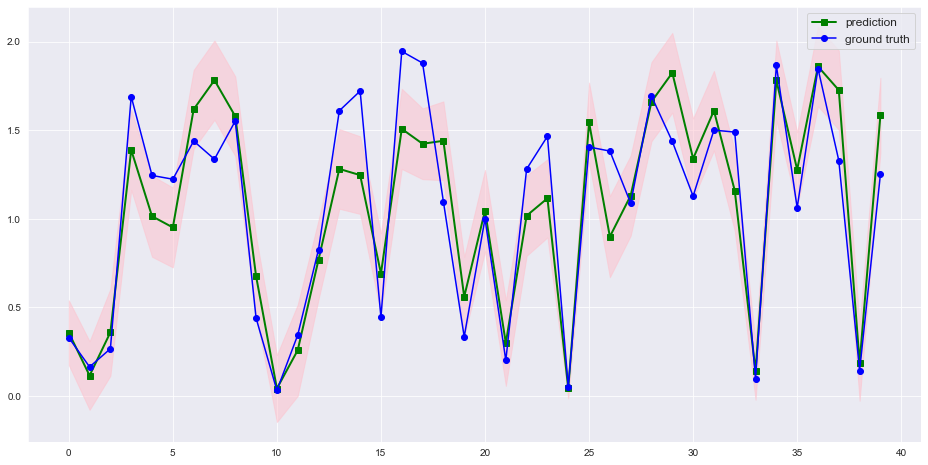

In [51]:
plt.figure(figsize=(16,8))

plt.plot(y_pred[:40], '-sg', linewidth=2, label='prediction')
plt.plot(y_test[:40], '-ob', label='ground truth')

plt.fill_between(xx[:40], upper[:40],lower[:40], alpha=0.5, color='pink')

plt.legend(fontsize=12)
#plt.savefig("trial.pdf", bbox_inches="tight")
plt.show()

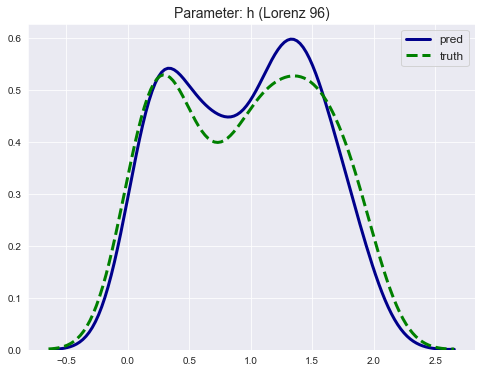

In [52]:
plt.figure(figsize=(8,6))

sns.distplot(y_pred, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, label='pred')

sns.distplot(y_test, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, 'linestyle': '--'}, label='truth')

plt.title('Parameter: h (Lorenz 96)', fontsize=14)
plt.legend(fontsize=12)
#plt.savefig('h_t_50_i_40_layers_24_12_6.pdf')
plt.show()

In [53]:
print(sklearn.metrics.mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
print(sklearn.metrics.mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
print(sklearn.metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))

0.05403588063340956
0.17682991861835462
0.8480469701150676


In [54]:
h = y_pred[0]
b = b_truth_last[0]
c = c_truth_last[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history
x = out.X.values
x.shape


(10201, 4)

In [55]:
h = y_test[0]
b = b_truth_last[0]
c = c_truth_last[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history

x_ = out.X.values
x_.shape


(10201, 4)

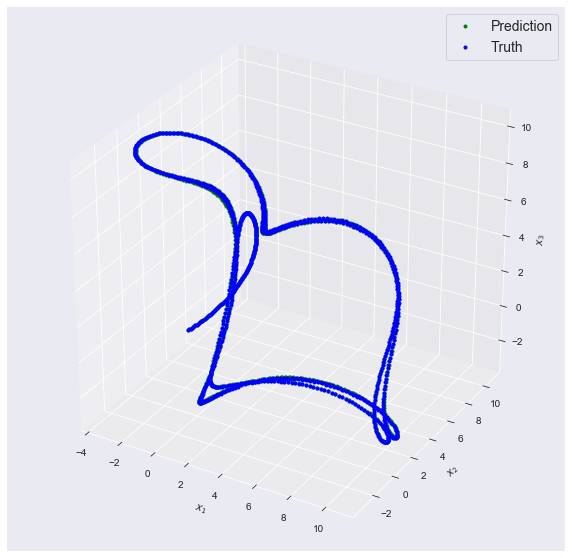

In [57]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(x[from_to,0],x[from_to,1], x[from_to,2], '.g', label='Prediction')
ax.plot(x_[from_to,0],x_[from_to,1], x_[from_to,2], '.b', label='Truth')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend(fontsize=14)
#plt.title('Pred')

# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot(x_[:,0],x_[:,1], x_[:,2], '.b')
# ax.set_xlabel('$x_1$')
# ax.set_ylabel('$x_2$')
# ax.set_zlabel('$x_3$')
# plt.title('Truth')

plt.show()

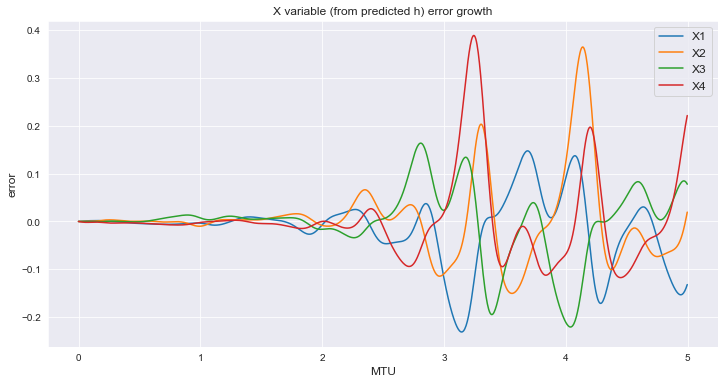

In [58]:
mtu = np.arange(0,1000)*dt

plt.figure(figsize=(12,6))
plt.plot(mtu, x[from_to,0]-x_[from_to,0], label='X1')
plt.plot(mtu, x[from_to,1]-x_[from_to,1], label='X2')
plt.plot(mtu, x[from_to,2]-x_[from_to,2], label='X3')
plt.plot(mtu, x[from_to,3]-x_[from_to,3], label='X4')
plt.ylabel('error', fontsize=12)
plt.xlabel('MTU', fontsize=12)
plt.title('X variable (from predicted h) error growth')
plt.legend(fontsize=12)
plt.show()